<a href="https://colab.research.google.com/github/eeolga/deep/blob/main/Logs_data4_csv_preparing_tensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch

In [ ]:
import pandas as pd

In [ ]:
import torch
from torch import nn

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
from pathlib import Path

In [ ]:
import csv

In [ ]:
CAD_path="/content/logs_4_csv.csv"

In [ ]:
df = pd.read_csv('/content/logs_4_csv.csv')
test_df = pd.read_csv('/content/logs_4_csv.csv')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 1 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade  17 non-null     object
dtypes: object(1)
memory usage: 264.0+ bytes


In [ ]:
df.sample(5)

,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade
10,26610;4;1;1;21;7;1;1;0
4,26544;4;1;1;21;9;1;1;5
8,29346;1;1;1;20;4;1;1;5
9,26563;4;1;1;21;14;1;1;4
14,29349;1;0;1;26;13;3;1;4


In [ ]:
df.describe(include=object) #object-type columns

,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade
count,17
unique,17
top,29292;1;1;0;20;23;3;1;5
freq,1


Settings

In [ ]:
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df.sample(n=5) # Random sample of rows for checking

,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade
13,29723;1;1;1;20;14;1;1;4
9,26563;4;1;1;21;14;1;1;4
15,29350;1;1;1;20;6;1;1;5
1,26864;2;0;1;NaN;7;3;0;0
12,29684;1;1;1;NaN;5;2;0;4


Data clearning

In [ ]:
df.isna().sum() #Columns with missing value

ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade    0
dtype: int64

In [ ]:
#Fill missing values with the modes
train_modes = df.mode().iloc[0]
train_modes

ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade    23558;4;1;0;NaN;7;3;0;0
Name: 0, dtype: object

In [ ]:

def fill_missing(df, modes):
    df = df.fillna(modes)
    return df

df = fill_missing(df, train_modes)

In [ ]:
df

,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade
0,29292;1;1;0;20;23;3;1;5
1,26864;2;0;1;NaN;7;3;0;0
2,26861;2;0;1;21;18;1;1;3
3,26760;3;1;0;NaN;8;1;1;5
4,26544;4;1;1;21;9;1;1;5
5,29598;11;1;1;25;7;1;1;0
6,29133;1;1;1;20;14;1;1;5
7,26604;2;0;1;23;6;1;1;4
8,29346;1;1;1;20;4;1;1;5
9,26563;4;1;1;21;14;1;1;4


Dummy variables addition:

In [ ]:
def add_dummies(df):
    df = pd.get_dummies(df)
    return df
df = add_dummies(df)

df

,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_23558;4;1;0;NaN;7;3;0;0,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_26544;4;1;1;21;9;1;1;5,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_26563;4;1;1;21;14;1;1;4,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_26604;2;0;1;23;6;1;1;4,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_26610;4;1;1;21;7;1;1;0,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_26760;3;1;0;NaN;8;1;1;5,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_26789;3;1;1;22;12;2;0;0,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_26861;2;0;1;21;18;1;1;3,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_26864;2;0;1;NaN;7;3;0;0,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_29133;1;1;1;20;14;1;1;5,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_29292;1;1;0;20;23;3;1;5,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_29346;1;1;1;20;4;1;1;5,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_29349;1;0;1;26;13;3;1;4,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_29350;1;1;1;20;6;1;1;5,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_29598;11;1;1;25;7;1;1;0,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_29684;1;1;1;NaN;5;2;0;4,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_29723;1;1;1;20;14;1;1;4
0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
6,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
7,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
9,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Tensors

In [ ]:
CADsq_numpy = np.loadtxt(CAD_path, dtype=np.float32,delimiter=";", skiprows=1)

In [ ]:
CADsq_numpy

array([[2.9292e+04, 1.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+01,
        2.3000e+01, 3.0000e+00, 1.0000e+00, 5.0000e+00],
       [2.6864e+04, 2.0000e+00, 0.0000e+00, 1.0000e+00,        nan,
        7.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00],
       [2.6861e+04, 2.0000e+00, 0.0000e+00, 1.0000e+00, 2.1000e+01,
        1.8000e+01, 1.0000e+00, 1.0000e+00, 3.0000e+00],
       [2.6760e+04, 3.0000e+00, 1.0000e+00, 0.0000e+00,        nan,
        8.0000e+00, 1.0000e+00, 1.0000e+00, 5.0000e+00],
       [2.6544e+04, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.1000e+01,
        9.0000e+00, 1.0000e+00, 1.0000e+00, 5.0000e+00],
       [2.9598e+04, 1.1000e+01, 1.0000e+00, 1.0000e+00, 2.5000e+01,
        7.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00],
       [2.9133e+04, 1.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+01,
        1.4000e+01, 1.0000e+00, 1.0000e+00, 5.0000e+00],
       [2.6604e+04, 2.0000e+00, 0.0000e+00, 1.0000e+00, 2.3000e+01,
        6.0000e+00, 1.0000e+00, 1.0000e+00, 4.0000e+00],


In [ ]:
col_list = next(csv.reader(open(CAD_path), delimiter=';'))

In [ ]:
CADsq_numpy.shape, col_list

((17, 9),
 ['\ufeffID',
  'Spec',
  'MotherTongue',
  'Gender',
  'Age',
  'Activity',
  'DayPart',
  'Lesson',
  'Grade'])

In [ ]:
CADsq = torch.from_numpy(CADsq_numpy)

In [ ]:
CADsq.shape, CADsq.dtype

(torch.Size([17, 9]), torch.float32)

In [ ]:
data = CADsq[:, :-1]  #select all rows and colomns exept the last

In [ ]:
data, data.shape

(tensor([[2.9292e+04, 1.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+01, 2.3000e+01,
          3.0000e+00, 1.0000e+00],
         [2.6864e+04, 2.0000e+00, 0.0000e+00, 1.0000e+00,        nan, 7.0000e+00,
          3.0000e+00, 0.0000e+00],
         [2.6861e+04, 2.0000e+00, 0.0000e+00, 1.0000e+00, 2.1000e+01, 1.8000e+01,
          1.0000e+00, 1.0000e+00],
         [2.6760e+04, 3.0000e+00, 1.0000e+00, 0.0000e+00,        nan, 8.0000e+00,
          1.0000e+00, 1.0000e+00],
         [2.6544e+04, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.1000e+01, 9.0000e+00,
          1.0000e+00, 1.0000e+00],
         [2.9598e+04, 1.1000e+01, 1.0000e+00, 1.0000e+00, 2.5000e+01, 7.0000e+00,
          1.0000e+00, 1.0000e+00],
         [2.9133e+04, 1.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+01, 1.4000e+01,
          1.0000e+00, 1.0000e+00],
         [2.6604e+04, 2.0000e+00, 0.0000e+00, 1.0000e+00, 2.3000e+01, 6.0000e+00,
          1.0000e+00, 1.0000e+00],
         [2.9346e+04, 1.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000

In [ ]:
target = CADsq[:, -1]  #select all rows

In [ ]:
target, target.shape

(tensor([5., 0., 3., 5., 5., 0., 5., 4., 5., 4., 0., 0., 4., 4., 4., 5., 0.]),
 torch.Size([17]))

In [ ]:
target = CADsq[:, -1] .long() #labels as an integrated vector

In [ ]:
target

tensor([5, 0, 3, 5, 5, 0, 5, 4, 5, 4, 0, 0, 4, 4, 4, 5, 0])

In [ ]:
target_onehot = torch.zeros(target.shape[0], 9) #score  1* (1,0,0,0,0,0,0,0,0) score  5* (0,0,0,0,1,0,0,0,0)
target_onehot.scatter_(1, target.unsqueeze(1), 1.0)

tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
target_unsqueezed = target.unsqueeze(1)

In [ ]:
target_unsqueezed

tensor([[5],
        [0],
        [3],
        [5],
        [5],
        [0],
        [5],
        [4],
        [5],
        [4],
        [0],
        [0],
        [4],
        [4],
        [4],
        [5],
        [0]])

In [ ]:
data_mean =torch.mean(data, dim=0) #Categorizing
data_mean

tensor([2.7802e+04, 2.7059e+00, 7.6471e-01, 8.2353e-01,        nan, 1.0235e+01,
        1.5882e+00, 7.6471e-01])

In [ ]:
data_var=torch.var(data, dim=0)
data_var

tensor([3.0928e+06, 6.0956e+00, 1.9118e-01, 1.5441e-01,        nan, 2.6691e+01,
        7.5735e-01, 1.9118e-01])

In [ ]:
data_normalized= (data - data_mean) / torch.sqrt(data_var)  #data normalization
data_normalized

tensor([[ 0.8474, -0.6909,  0.5381, -2.0957,     nan,  2.4707,  1.6222,  0.5381],
        [-0.5332, -0.2859, -1.7489,  0.4491,     nan, -0.6262,  1.6222, -1.7489],
        [-0.5349, -0.2859, -1.7489,  0.4491,     nan,  1.5029, -0.6759,  0.5381],
        [-0.5923,  0.1191,  0.5381, -2.0957,     nan, -0.4327, -0.6759,  0.5381],
        [-0.7151,  0.5242,  0.5381,  0.4491,     nan, -0.2391, -0.6759,  0.5381],
        [ 1.0214,  3.3594,  0.5381,  0.4491,     nan, -0.6262, -0.6759,  0.5381],
        [ 0.7570, -0.6909,  0.5381,  0.4491,     nan,  0.7287, -0.6759,  0.5381],
        [-0.6810, -0.2859, -1.7489,  0.4491,     nan, -0.8198, -0.6759,  0.5381],
        [ 0.8781, -0.6909,  0.5381,  0.4491,     nan, -1.2069, -0.6759,  0.5381],
        [-0.7043,  0.5242,  0.5381,  0.4491,     nan,  0.7287, -0.6759,  0.5381],
        [-0.6776,  0.5242,  0.5381,  0.4491,     nan, -0.6262, -0.6759,  0.5381],
        [-0.5758,  0.1191,  0.5381,  0.4491,     nan,  0.3416,  0.4732, -1.7489],
        [ 1.0703

In [ ]:
low_grade = target <= 2
low_grade.shape, low_grade.dtype, low_grade.sum()

(torch.Size([17]), torch.bool, tensor(5))

In [ ]:
low_data = data[low_grade]
low_data.shape

torch.Size([5, 8])

In [ ]:
low_data - data[target <= 2]
mid_data = data [ (target > 2) & (target < 5)]
high_data = data[target >= 3]

In [ ]:
low_mean = torch.mean(low_data, dim=0)
mid_mean = torch.mean(mid_data, dim= 0)
high_mean = torch.mean(high_data, dim= 0)

In [ ]:
for i, args in enumerate(zip(col_list, low_mean, mid_mean, high_mean)):
  print('{:2} {:10} {:7.6f} {:7.6f} {:7.6f}'.format(i, *args))

 0 ﻿ID        26683.800781 28130.666016 28267.416016
 1 Spec       4.800000 1.833333 1.833333
 2 MotherTongue 0.800000 0.500000 0.750000
 3 Gender     0.800000 1.000000 0.833333
 4 Age            nan     nan     nan
 5 Activity   8.000000 11.666667 11.166667
 6 DayPart    2.000000 1.500000 1.416667
 7 Lesson     0.400000 0.833333 0.916667


In [ ]:
Activity_threshold = 11.67
Activity_data = data[:,7]

In [ ]:
predicted_indexes = torch.lt(Activity_data,Activity_threshold)

In [ ]:
predicted_indexes.shape, predicted_indexes.dtype,
predicted_indexes.sum()

tensor(17)

In [ ]:
actual_indexes = target > 2
actual_indexes.shape, actual_indexes.dtype,
actual_indexes.sum()

tensor(12)

In [ ]:
n_matches = torch.sum(actual_indexes &predicted_indexes) .item()

In [ ]:
n_predicted = torch.sum(predicted_indexes) .item()
n_actual = torch.sum(actual_indexes) .item()
n_matches, n_matches / n_predicted, n_matches / n_actual

(12, 0.7058823529411765, 1.0)

In [ ]:
df

,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_23558;4;1;0;NaN;7;3;0;0,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_26544;4;1;1;21;9;1;1;5,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_26563;4;1;1;21;14;1;1;4,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_26604;2;0;1;23;6;1;1;4,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_26610;4;1;1;21;7;1;1;0,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_26760;3;1;0;NaN;8;1;1;5,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_26789;3;1;1;22;12;2;0;0,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_26861;2;0;1;21;18;1;1;3,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_26864;2;0;1;NaN;7;3;0;0,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_29133;1;1;1;20;14;1;1;5,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_29292;1;1;0;20;23;3;1;5,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_29346;1;1;1;20;4;1;1;5,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_29349;1;0;1;26;13;3;1;4,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_29350;1;1;1;20;6;1;1;5,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_29598;11;1;1;25;7;1;1;0,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_29684;1;1;1;NaN;5;2;0;4,ID;Spec;MotherTongue;Gender;Age;Activity;DayPart;Lesson;Grade_29723;1;1;1;20;14;1;1;4
0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
6,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
7,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
9,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Training

In [ ]:
import numpy as np
import torch

In [ ]:
t_g = [5, 0, 3, 5, 5, 0, 5, 4, 5, 4, 0, 0, 4, 4, 4, 5, 0]
t_a = (23, 7, 18, 8, 9, 7, 14, 6, 4, 14, 7, 12, 5, 14, 13, 6, 7)

In [ ]:
t_g = torch.tensor(t_g)
t_a = torch.tensor(t_a)

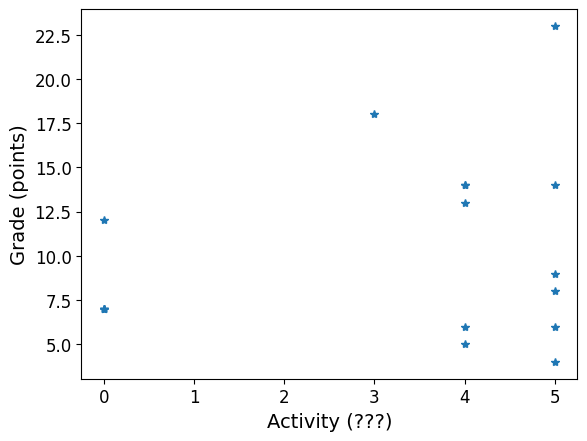

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

fig = plt.figure(dpi=100)
plt.xlabel("Activity (???)")
plt.ylabel("Grade (points)")
plt.plot(t_g, t_a, '*')

Model

In [ ]:
def model(t_a, w, b): return w *t_a + b #(w - weight, b-bTas)

In [ ]:
def loss_fn(t_p, t_g):
    squared_diffs =(t_p - t_g)**2
    return squared_diffs.mean()

In [ ]:
w=torch.ones(())
b=torch.zeros(())

t_p = model(t_a, w, b)
t_p

tensor([23.,  7., 18.,  8.,  9.,  7., 14.,  6.,  4., 14.,  7., 12.,  5., 14.,
        13.,  6.,  7.])

In [ ]:
loss= loss_fn(t_p, t_g)
loss

tensor(75.4706)

In [ ]:
delta=0.1 # gradient descent

In [ ]:
loss_rate_of_change_w = \
    (loss_fn(model(t_a, w + delta, b), t_g) - loss_fn(model(t_a, w - delta, b), t_g))/ (2.0 *delta)

In [ ]:
learning_rate=1e-2

In [ ]:
w=w - learning_rate * loss_rate_of_change_w

In [ ]:
loss_rate_of_change_b=\
    (loss_fn(model(t_a, w, b + delta), t_g) -
    loss_fn(model(t_a, w, b - delta), t_g))/ (2.0*delta)

b=b-learning_rate*loss_rate_of_change_b

In [ ]:
def dloss_fn(t_p, t_g): #derivate of loss is computed
    dsq_diffs = 2 *(t_p - t_g) / t_p.size(0)
    return dsq_diffs

In [ ]:
def dmodel_dw(t_a, w, b):
   return t_a

In [ ]:
def dmodel_db(t_a, w, b):
   return 1.0

Gradient

In [ ]:
def grad_fn(t_a, t_g, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_g)
    dloss_dw = dloss_dtp * dmodel_dw(t_a, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_a, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

Iterating to fit

In [ ]:
def training_loop(n_epochs, learning_rate, params, t_a, t_g, print_params=True):
   for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = model(t_a, w, b) # Forward pass
        loss = loss_fn(t_p, t_g)
        grad = grad_fn(t_a, t_g, t_p, w, b) # backward pass

        params = params-learning_rate*grad
        print('Epoch %d, Loss %f' % (epoch, float(loss)))
   return params

In [ ]:
training_loop( n_epochs = 100, learning_rate = 1e-2, params =torch.tensor([1.0, 0.0]),t_a = t_a,t_g=t_g)

Epoch 1, Loss 75.470589
Epoch 2, Loss 188.388626
Epoch 3, Loss 482.479675
Epoch 4, Loss 1248.409790
Epoch 5, Loss 3243.178223
Epoch 6, Loss 8438.280273
Epoch 7, Loss 21968.201172
Epoch 8, Loss 57204.988281
Epoch 9, Loss 148974.218750
Epoch 10, Loss 387974.406250
Epoch 11, Loss 1010416.812500
Epoch 12, Loss 2631480.750000
Epoch 13, Loss 6853314.500000
Epoch 14, Loss 17848482.000000
Epoch 15, Loss 46483856.000000
Epoch 16, Loss 121060656.000000
Epoch 17, Loss 315285312.000000
Epoch 18, Loss 821116096.000000
Epoch 19, Loss 2138480384.000000
Epoch 20, Loss 5569372160.000000
Epoch 21, Loss 14504635392.000000
Epoch 22, Loss 37775253504.000000
Epoch 23, Loss 98380308480.000000
Epoch 24, Loss 256217628672.000000
Epoch 25, Loss 667282767872.000000
Epoch 26, Loss 1737843802112.000000
Epoch 27, Loss 4525970161664.000000
Epoch 28, Loss 11787254628352.000000
Epoch 29, Loss 30698247290880.000000
Epoch 30, Loss 79949239156736.000000
Epoch 31, Loss 208216474517504.000000
Epoch 32, Loss 542270457643008

tensor([4.4598e+20, 3.5197e+19])

In [ ]:
training_loop(
    n_epochs = 100,
    learning_rate = 1e-4,
    params = torch.tensor([1.0, 0.0]),
    t_a = t_a,
    t_g = t_g)

Epoch 1, Loss 75.470589
Epoch 2, Loss 71.839066
Epoch 3, Loss 68.394897
Epoch 4, Loss 65.128426
Epoch 5, Loss 62.030487
Epoch 6, Loss 59.092358
Epoch 7, Loss 56.305817
Epoch 8, Loss 53.663040
Epoch 9, Loss 51.156597
Epoch 10, Loss 48.779476
Epoch 11, Loss 46.524990
Epoch 12, Loss 44.386814
Epoch 13, Loss 42.358959
Epoch 14, Loss 40.435711
Epoch 15, Loss 38.611702
Epoch 16, Loss 36.881779
Epoch 17, Loss 35.241108
Epoch 18, Loss 33.685085
Epoch 19, Loss 32.209328
Epoch 20, Loss 30.809713
Epoch 21, Loss 29.482302
Epoch 22, Loss 28.223373
Epoch 23, Loss 27.029398
Epoch 24, Loss 25.897011
Epoch 25, Loss 24.823044
Epoch 26, Loss 23.804489
Epoch 27, Loss 22.838476
Epoch 28, Loss 21.922298
Epoch 29, Loss 21.053391
Epoch 30, Loss 20.229301
Epoch 31, Loss 19.447725
Epoch 32, Loss 18.706469
Epoch 33, Loss 18.003454
Epoch 34, Loss 17.336702
Epoch 35, Loss 16.704351
Epoch 36, Loss 16.104622
Epoch 37, Loss 15.535830
Epoch 38, Loss 14.996376
Epoch 39, Loss 14.484751
Epoch 40, Loss 13.999519
Epoch 41,

tensor([ 0.3195, -0.0451])

Input normalizing

In [ ]:
t_an = 0.1 *t_a

In [ ]:
training_loop(n_epochs = 100, learning_rate = 1e-2, params =torch.tensor([1.0, 0.0]),t_a = t_an,t_g = t_g)

Epoch 1, Loss 8.510588
Epoch 2, Loss 8.162343
Epoch 3, Loss 7.843731
Epoch 4, Loss 7.552220
Epoch 5, Loss 7.285496
Epoch 6, Loss 7.041444
Epoch 7, Loss 6.818122
Epoch 8, Loss 6.613765
Epoch 9, Loss 6.426748
Epoch 10, Loss 6.255592
Epoch 11, Loss 6.098943
Epoch 12, Loss 5.955563
Epoch 13, Loss 5.824316
Epoch 14, Loss 5.704166
Epoch 15, Loss 5.594169
Epoch 16, Loss 5.493454
Epoch 17, Loss 5.401230
Epoch 18, Loss 5.316773
Epoch 19, Loss 5.239419
Epoch 20, Loss 5.168560
Epoch 21, Loss 5.103644
Epoch 22, Loss 5.044162
Epoch 23, Loss 4.989652
Epoch 24, Loss 4.939688
Epoch 25, Loss 4.893883
Epoch 26, Loss 4.851882
Epoch 27, Loss 4.813360
Epoch 28, Loss 4.778021
Epoch 29, Loss 4.745594
Epoch 30, Loss 4.715828
Epoch 31, Loss 4.688499
Epoch 32, Loss 4.663398
Epoch 33, Loss 4.640337
Epoch 34, Loss 4.619138
Epoch 35, Loss 4.599646
Epoch 36, Loss 4.581715
Epoch 37, Loss 4.565211
Epoch 38, Loss 4.550013
Epoch 39, Loss 4.536011
Epoch 40, Loss 4.523102
Epoch 41, Loss 4.511193
Epoch 42, Loss 4.500200
E

tensor([1.7919, 1.1444])

In [ ]:
training_loop(n_epochs = 5000, learning_rate = 1e-2, params =torch.tensor([1.0, 0.0]),t_a = t_an,t_g = t_g)

Epoch 1, Loss 8.510588
Epoch 2, Loss 8.162343
Epoch 3, Loss 7.843731
Epoch 4, Loss 7.552220
Epoch 5, Loss 7.285496
Epoch 6, Loss 7.041444
Epoch 7, Loss 6.818122
Epoch 8, Loss 6.613765
Epoch 9, Loss 6.426748
Epoch 10, Loss 6.255592
Epoch 11, Loss 6.098943
Epoch 12, Loss 5.955563
Epoch 13, Loss 5.824316
Epoch 14, Loss 5.704166
Epoch 15, Loss 5.594169
Epoch 16, Loss 5.493454
Epoch 17, Loss 5.401230
Epoch 18, Loss 5.316773
Epoch 19, Loss 5.239419
Epoch 20, Loss 5.168560
Epoch 21, Loss 5.103644
Epoch 22, Loss 5.044162
Epoch 23, Loss 4.989652
Epoch 24, Loss 4.939688
Epoch 25, Loss 4.893883
Epoch 26, Loss 4.851882
Epoch 27, Loss 4.813360
Epoch 28, Loss 4.778021
Epoch 29, Loss 4.745594
Epoch 30, Loss 4.715828
Epoch 31, Loss 4.688499
Epoch 32, Loss 4.663398
Epoch 33, Loss 4.640337
Epoch 34, Loss 4.619138
Epoch 35, Loss 4.599646
Epoch 36, Loss 4.581715
Epoch 37, Loss 4.565211
Epoch 38, Loss 4.550013
Epoch 39, Loss 4.536011
Epoch 40, Loss 4.523102
Epoch 41, Loss 4.511193
Epoch 42, Loss 4.500200
E

tensor([0.9256, 2.1702])